# Экзаменационное задание 

## Шаг 1. Скачал 20 случайных геномов рода Acinetobacter

In [ ]:
!datasets summary genome taxon 469 \
  --assembly-level complete \
  --annotated \
  > acinetobacter_metadata.json

In [10]:
import json
from collections import defaultdict

METADATA_FILE = "acinetobacter_metadata.json"
N_GENOMES = 20

with open(METADATA_FILE) as f:
    metadata = json.load(f)

reports = metadata["reports"]

print(f"Total assemblies loaded: {len(reports)}")

by_species = defaultdict(list)

for r in reports:
    accession = r["accession"]
    organism = r["organism"]["organism_name"]
    by_species[organism].append(accession)

selected = []

for species, accs in by_species.items():
    if len(selected) >= N_GENOMES:
        break
    selected.append(accs[0])

if len(selected) < N_GENOMES:
    for species, accs in by_species.items():
        for acc in accs[1:]:
            if len(selected) >= N_GENOMES:
                break
            selected.append(acc)

selected = selected[:N_GENOMES]

print("Selected assemblies:")
for acc in selected:
    print(acc)

Total assemblies loaded: 3161
Expected total_count: 3161

Selected assemblies:
GCF_009035845.1
GCF_000188215.1
GCF_000021245.2
GCF_002803025.2
GCA_000307975.2
GCF_000018445.1
GCF_004797155.2
GCF_019331655.1
GCF_000069245.1
GCF_000419385.1
GCF_000419405.1
GCF_000419425.1
GCF_028370175.1
GCF_000186665.3
GCF_000498375.2
GCF_000786735.1
GCF_000187205.2
GCF_000226275.2
GCF_000828795.1
GCA_000189735.2


In [12]:
with open("selected_assemblies.txt", "w") as f:
    for acc in selected:
        f.write(acc + "\n")

In [13]:
!cat selected_assemblies.txt

GCF_009035845.1
GCF_000188215.1
GCF_000021245.2
GCF_002803025.2
GCA_000307975.2
GCF_000018445.1
GCF_004797155.2
GCF_019331655.1
GCF_000069245.1
GCF_000419385.1
GCF_000419405.1
GCF_000419425.1
GCF_028370175.1
GCF_000186665.3
GCF_000498375.2
GCF_000786735.1
GCF_000187205.2
GCF_000226275.2
GCF_000828795.1
GCA_000189735.2


In [14]:
!datasets download genome accession \
$(cat selected_assemblies.txt | tr '\n' ' ') \
--include protein \
--annotated

Downloading: ncbi_dataset.zip    847B 2MB/s
Downloading: ncbi_dataset.zip    847B 2MB/s
Downloading: ncbi_dataset.zip    847B 2MB/s
Downloading: ncbi_dataset.zip    941B 36.1kB/s
Downloading: ncbi_dataset.zip    941B 36.1kB/s
Downloading: ncbi_dataset.zip    941B 36.1kB/s
Downloading: ncbi_dataset.zip    941B 36.1kB/s
Downloading: ncbi_dataset.zip    941B 36.1kB/s
Downloading: ncbi_dataset.zip    13.6kB 164kB/s
Downloading: ncbi_dataset.zip    13.6kB 164kB/s
Downloading: ncbi_dataset.zip    13.7kB 134kB/s
Downloading: ncbi_dataset.zip    13.7kB 134kB/s
Downloading: ncbi_dataset.zip    13.7kB 134kB/s
Downloading: ncbi_dataset.zip    13.7kB 134kB/s
Downloading: ncbi_dataset.zip    13.7kB 134kB/s
Downloading: ncbi_dataset.zip    13.7kB 134kB/s
Downloading: ncbi_dataset.zip    13.7kB 134kB/s
Downloading: ncbi_dataset.zip    13.7kB 134kB/s
Downloading: ncbi_dataset.zip    13.7kB 134kB/s
Downloading: ncbi_dataset.zip    13.7kB 134kB/s
Downloading: ncbi_dataset.zip    13.7kB 134kB/s
Downloadi

In [15]:
!unzip ncbi_dataset.zip

Archive:  ncbi_dataset.zip
  inflating: README.md               
  inflating: ncbi_dataset/data/assembly_data_report.jsonl  
  inflating: ncbi_dataset/data/GCA_000189735.2/protein.faa  
  inflating: ncbi_dataset/data/GCA_000307975.2/protein.faa  
  inflating: ncbi_dataset/data/GCF_000018445.1/protein.faa  
  inflating: ncbi_dataset/data/GCF_000021245.2/protein.faa  
  inflating: ncbi_dataset/data/GCF_000069245.1/protein.faa  
  inflating: ncbi_dataset/data/GCF_000186665.3/protein.faa  
  inflating: ncbi_dataset/data/GCF_000187205.2/protein.faa  
  inflating: ncbi_dataset/data/GCF_000188215.1/protein.faa  
  inflating: ncbi_dataset/data/GCF_000226275.2/protein.faa  
  inflating: ncbi_dataset/data/GCF_000419385.1/protein.faa  
  inflating: ncbi_dataset/data/GCF_000419405.1/protein.faa  
  inflating: ncbi_dataset/data/GCF_000419425.1/protein.faa  
  inflating: ncbi_dataset/data/GCF_000498375.2/protein.faa  
  inflating: ncbi_dataset/data/GCF_000786735.1/protein.faa  
  inflating: ncbi_dat

## Шаг 2. Нахожу HP

In [28]:
from Bio import SeqIO
from pathlib import Path

DATA_DIR = Path("ncbi_dataset/data")
OUTPUT_FILE = Path("acinetobacter_baumannii_unique_HPs.faa")

unique_headers = set()
unique_records = []

for asm_dir in DATA_DIR.iterdir():
    prot_file = asm_dir / "protein.faa"
    if not prot_file.exists():
        continue

    assembly_id = asm_dir.name

    for record in SeqIO.parse(prot_file, "fasta"):
        desc = record.description.lower()

        if "hypothetical" in desc or "uncharacterized" in desc:
            header = record.description 
            if header not in unique_headers:
                unique_headers.add(header)
                record.id = f"{assembly_id}|{record.id}"
                record.name = record.id
                record.description = record.description
                unique_records.append(record)

SeqIO.write(unique_records, OUTPUT_FILE, "fasta")

print(f"Unique hypothetical proteins: {len(unique_records)}")
print(f"Saved to {OUTPUT_FILE}")

Unique hypothetical proteins: 5515
Saved to acinetobacter_baumannii_unique_HPs.faa


In [25]:
!head -n 5 acinetobacter_20_HPs.faa

>WP_000003535.1 MULTISPECIES: hypothetical protein [Acinetobacter]
MSEQQLRKVKGIWCKFNNQNRMSTVTLDEMRICCIKRGVEIIEIEECTFGFNQSIPAIKI
TVANNLTALLPRQKLFDIQIYKNNILPFKKEEEFWHKVDWFPPVFMNMEMINEGFKVTNL
KIGYQDYFNKTQLQERFSEFFPTVYNLSNIIPITIQTLPKSISISKHVPVIRESILAFYS
GMRVTSVASLIPIVEDILNSIIEDADEDLKLKDKVQRCIARARENITSDHILGADWIPDE


## Шаг 3. Передал белки HP в DeepSecE на интерфонике. Получил таблицу с результатами классификации

In [2]:
import pandas as pd
deepsece_df = pd.read_csv('results.csv')
deepsece_df.head()

,name,system,score,NonSecreted.prob,T1SE.prob,T2SE.prob,T3SE.prob,T4SE.prob,T6SE.prob,length
0,GCF_028370175.1|WP_000008496.1,VI,0.5087,0.4716,0.0067,0.0023,0.0078,0.0030,0.5087,129
1,GCF_028370175.1|WP_000030336.1,VI,0.9989,0.0001,0.0002,0.0000,0.0008,0.0000,0.9989,270
2,GCF_028370175.1|WP_000064570.1,VI,0.7392,0.0012,0.0817,0.0100,0.1671,0.0008,0.7392,116
3,GCF_028370175.1|WP_000066269.1,VI,0.7955,0.1882,0.0067,0.0003,0.0057,0.0035,0.7955,59
4,GCF_028370175.1|WP_000086293.1,VI,0.5603,0.2122,0.0928,0.0175,0.0264,0.0909,0.5603,54


## Шаг 4. Определяю наличие компонентов системы T6SS.

### Перекидываю все файлы в одну папку, чтобы затем передать их на сервер

In [26]:
import os
import shutil

ROOT_DIR = "ncbi_dataset/data"
OUTPUT_DIR = "proteins" 

os.makedirs(OUTPUT_DIR, exist_ok=True)

for root, dirs, files in os.walk(ROOT_DIR):
    dir_name = os.path.basename(root)

    if root == ROOT_DIR:
        continue

    for file in files:
        old_path = os.path.join(root, file)
        new_name = f"{dir_name}_{file}"
        new_path = os.path.join(OUTPUT_DIR, new_name)

        counter = 1
        final_path = new_path
        while os.path.exists(final_path):
            name, ext = os.path.splitext(new_name)
            final_path = os.path.join(OUTPUT_DIR, f"{name}_{counter}{ext}")
            counter += 1

        shutil.copy2(old_path, final_path)

In [27]:
!zip -r proteins.zip proteins

  adding: proteins/ (stored 0%)
  adding: proteins/GCF_000498375.2_protein.faa (deflated 47%)
  adding: proteins/GCF_000187205.2_protein.faa (deflated 47%)
  adding: proteins/GCF_000069245.1_protein.faa (deflated 47%)
  adding: proteins/GCF_000188215.1_protein.faa (deflated 47%)
  adding: proteins/GCF_000186665.3_protein.faa (deflated 46%)
  adding: proteins/GCF_019331655.1_protein.faa (deflated 46%)
  adding: proteins/GCF_000018445.1_protein.faa (deflated 47%)
  adding: proteins/GCF_009035845.1_protein.faa (deflated 47%)
  adding: proteins/GCF_000828795.1_protein.faa (deflated 47%)
  adding: proteins/GCF_004797155.2_protein.faa (deflated 47%)
  adding: proteins/GCF_000021245.2_protein.faa (deflated 47%)
  adding: proteins/GCA_000189735.2_protein.faa (deflated 49%)
  adding: proteins/GCF_000419425.1_protein.faa (deflated 47%)
  adding: proteins/GCF_028370175.1_protein.faa (deflated 47%)
  adding: proteins/GCF_002803025.2_protein.faa (deflated 47%)
  adding: proteins/GCF_000226275.2_pro

### Получил результаты через pfam

In [3]:
!unzip pfam.zip

Archive:  pfam.zip
   creating: DondokovBato/pham
  inflating: DondokovBato/pham/GCF_000187205.2_protein_pham.txt  
  inflating: DondokovBato/pham/GCF_009035845.1_protein_pham.txt  
  inflating: DondokovBato/pham/GCA_000189735.2_protein_pham.txt  
  inflating: DondokovBato/pham/GCF_000828795.1_protein_pham.txt  
  inflating: DondokovBato/pham/GCF_000786735.1_protein_pham.txt  
  inflating: DondokovBato/pham/GCF_000498375.2_protein_pham.txt  
  inflating: DondokovBato/pham/GCF_000069245.1_protein_pham.txt  
  inflating: DondokovBato/pham/GCF_000186665.3_protein_pham.txt  
  inflating: DondokovBato/pham/GCF_000018445.1_protein_pham.txt  
  inflating: DondokovBato/pham/GCF_000188215.1_protein_pham.txt  
  inflating: DondokovBato/pham/GCA_000307975.2_protein_pham.txt  
  inflating: DondokovBato/pham/GCF_000419425.1_protein_pham.txt  
  inflating: DondokovBato/pham/GCF_000226275.2_protein_pham.txt  
  inflating: DondokovBato/pham/GCF_000419405.1_protein_pham.txt  
  inflating: DondokovBato/

In [9]:
# пример для одного файла
pfam_df = pd.read_csv('DondokovBato/pham/GCA_000189735.2_protein_pham.txt')
pfam_df.head()

,seq_id,aln_start,aln_end,env_start,env_end,hmm_acc,hmm_name,type,hmm_start,hmm_end,hmm_length,score,evalue,significance,clan
0,ADX90440.1,28,265,28,266,PF00561.27,Abhydrolase_1,Domain,1,244,245,102.0,5.500000e-29,1,CL0028
1,ADX90441.1,6,106,4,107,PF01521.27,Fe-S_biosyn,Domain,3,109,110,65.7,5.200000e-18,1,No_Clan
2,ADX90442.1,61,344,59,344,PF19582.5,AdeT1_2,Family,104,394,394,389.0,2.800000e-116,1,CL0177
3,ADX90443.1,52,336,45,338,PF19582.5,AdeT1_2,Family,105,392,394,284.0,2.300000e-84,1,CL0177
4,ADX90444.1,45,334,23,334,PF19582.5,AdeT1_2,Family,102,394,394,243.4,4.900000e-72,1,CL0177


### Получил результаты через kofam

In [10]:
!unzip kofam.zip

Archive:  kofam.zip
   creating: DondokovBato/kofam
  inflating: DondokovBato/kofam/GCF_000498375.2_protein_kofam.txt  
  inflating: DondokovBato/kofam/GCF_000069245.1_protein_kofam.txt  
  inflating: DondokovBato/kofam/GCF_000419405.1_protein_kofam.txt  
  inflating: DondokovBato/kofam/GCF_004797155.2_protein_kofam.txt  
  inflating: DondokovBato/kofam/GCF_002803025.2_protein_kofam.txt  
  inflating: DondokovBato/kofam/GCF_028370175.1_protein_kofam.txt  
  inflating: DondokovBato/kofam/GCF_000786735.1_protein_kofam.txt  
  inflating: DondokovBato/kofam/GCF_000226275.2_protein_kofam.txt  
  inflating: DondokovBato/kofam/GCF_000828795.1_protein_kofam.txt  
  inflating: DondokovBato/kofam/GCF_000419385.1_protein_kofam.txt  
  inflating: DondokovBato/kofam/GCF_019331655.1_protein_kofam.txt  
  inflating: DondokovBato/kofam/GCF_000187205.2_protein_kofam.txt  
  inflating: DondokovBato/kofam/GCA_000189735.2_protein_kofam.txt  
  inflating: DondokovBato/kofam/GCF_000419425.1_protein_kofam.tx

In [12]:
!cat DondokovBato/kofam/GCA_000189735.2_protein_kofam.txt

# gene name           KO     thrshld  score   E-value KO definition
#-------------------- ------ ------- ------ --------- ---------------------
  ADX90440.1          K22369  265.60  223.5   1.1e-66 epoxide hydrolase 4 [EC:3.3.-.-]
  ADX90440.1          K22368  501.83  163.0   2.2e-48 epoxide hydrolase 3 [EC:3.3.2.10]
  ADX90440.1          K08726  234.67  108.5     8e-32 soluble epoxide hydrolase / lipid-phosphate phosphatase [EC:3.3.2.10 3.1.3.76]
  ADX90440.1          K05714  265.80   86.3   5.2e-25 2-hydroxy-6-oxonona-2,4-dienedioate hydrolase [EC:3.7.1.14]
  ADX90440.1          K00433  197.40   85.5   1.1e-24 non-heme chloroperoxidase [EC:1.11.1.10]
  ADX90440.1          K01561  224.87   83.0     4e-24 haloacetate dehalogenase [EC:3.8.1.3]
  ADX90440.1          K01055  201.70   81.7   1.5e-23 3-oxoadipate enol-lactonase [EC:3.1.1.24]
  ADX90440.1          K01175  268.37   81.2   1.9e-23 esterase [EC:3.1.-.-]
  ADX90440.1          K01563  228.33   67.5   2.7e-19 haloalkane dehalogena

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



### Функция для считывания kofam файла

In [107]:
import numpy as np
import pandas as pd
import numpy as np
import re

def read_kofam_table(filename:str):

    with open(filename) as f:
        lines = f.readlines()
    dash_line =  next(l for l in lines if l.startswith("#-"))
    dash_blocks = re.findall(r"-+", dash_line)
    widths = [len(b) for b in dash_blocks[:-1]]

    slices = []
    start = 1 
    for w in widths:
        slices.append((start, start + w))
        start += w + 1
    slices.append((start, None))

    rows = []

    for line in lines:
        if line.startswith("#") or not line.strip():
            continue
        fields = [line[s:e].strip() for s, e in slices]
        gene, ko, thr, score, evalue, definition = fields

        rows.append([
            gene,
            ko,
            float(thr) if thr != "-" else np.nan,
            float(score) if score != "-" else np.nan,
            float(evalue) if evalue != "-" else np.nan,
            definition
        ])

    return pd.DataFrame(
        rows,
        columns=[
            "gene_name",
            "KO",
            "threshold",
            "score",
            "e_value",
            "KO_definition"
        ]
    )

kofam_df = read_kofam_table('DondokovBato/kofam/GCA_000189735.2_protein_kofam.txt')
kofam_df.head()

,gene_name,KO,threshold,score,e_value,KO_definition
0,ADX90440.1,K22369,265.60,223.5,1.100000e-66,epoxide hydrolase 4 [EC:3.3.-.-]
1,ADX90440.1,K22368,501.83,163.0,2.200000e-48,epoxide hydrolase 3 [EC:3.3.2.10]
2,ADX90440.1,K08726,234.67,108.5,8.000000e-32,soluble epoxide hydrolase / lipid-phosphate ph...
3,ADX90440.1,K05714,265.80,86.3,5.200000e-25,"2-hydroxy-6-oxonona-2,4-dienedioate hydrolase ..."
4,ADX90440.1,K00433,197.40,85.5,1.100000e-24,non-heme chloroperoxidase [EC:1.11.1.10]


### Анализ резултатов kofam и pfam

In [108]:
import glob
import os
KOFAM_DIR = "DondokovBato/kofam"
PFAM_DIR = "DondokovBato/pfam"
OUTPUT = "t6ss_presence.csv"

KOFAM_T6SS = {
    "K11901": "TssA",
    "K11900": "TssB",
    "K11899": "TssC",
    "K11903": "Hcp",
    "K11893": "VgrG",
    "K11892": "PAAR",
    "K11895": "ClpV",
    "K11897": "TssF",
    "K11896": "TssG",
    "K11891": "TssM",
}

PFAM_T6SS = {
    "PF05591": "Hcp",
    "PF04717": "VgrG",
    "PF05488": "PAAR",
    "PF06715": "ClpV",
    "PF04968": "TssB",
    "PF04969": "TssC",
    "PF08388": "TssM",
}

T6SS_GENES = sorted(set(KOFAM_T6SS.values()) | set(PFAM_T6SS.values()))


def detect_t6ss(kofam_file, pfam_file):
    presence = {g: 0 for g in T6SS_GENES}

    kofam_df = read_kofam_table(kofam_file)
    for ko in kofam_df["KO"].dropna().unique():
        if ko in KOFAM_T6SS:
            presence[KOFAM_T6SS[ko]] = 1

    if os.path.exists(pfam_file):
        pfam_df = pd.read_csv(pfam_file, sep="\t")
        for pfam in pfam_df["hmm_acc"].dropna().unique():
            pfam_id = pfam.split(".")[0]
            if pfam_id in PFAM_T6SS:
                presence[PFAM_T6SS[pfam_id]] = 1

    return presence

results = []

for kofam_file in glob.glob(os.path.join(KOFAM_DIR, "*_kofam.txt")):
    strain = os.path.basename(kofam_file).replace("_kofam.txt", "")
    pfam_file = os.path.join(PFAM_DIR, f"{strain}_pfam.txt")

    presence = detect_t6ss(kofam_file, pfam_file)
    presence["Strain"] = strain

    results.append(presence)

df = pd.DataFrame(results)
df = df[["Strain"] + T6SS_GENES]
df.to_csv(OUTPUT, index=False)

### Наличие генов T6SS

In [45]:
result_t6 = pd.read_csv('t6ss_presence.csv')
result_t6.head(20)

,Strain,ClpV,Hcp,PAAR,TssA,TssB,TssC,TssF,TssG,TssM,VgrG
0,GCF_000018445.1_protein,1,1,1,1,1,1,1,1,1,1
1,GCF_000498375.2_protein,1,1,1,1,1,1,1,1,1,1
2,GCF_000419405.1_protein,1,1,1,1,1,1,1,1,1,1
3,GCA_000307975.2_protein,1,1,1,1,1,1,1,1,1,1
4,GCF_000021245.2_protein,1,1,1,1,1,1,1,1,1,1
5,GCF_000069245.1_protein,1,1,1,1,1,1,1,1,1,1
6,GCF_002803025.2_protein,1,1,1,1,1,1,1,1,1,1
7,GCF_000786735.1_protein,0,0,1,0,0,1,0,0,1,1
8,GCF_000828795.1_protein,1,1,1,1,1,1,1,1,1,1
9,GCF_000226275.2_protein,1,1,1,1,1,1,1,1,1,1


## Шаг 5. Филогенетическое дерево

### Скачал gbff файлы, чтобы достать 16S rRNA

In [48]:
!datasets download genome accession \
$(cat selected_assemblies.txt | tr '\n' ' ') \
--include gbff,genome,gff3 \
--filename acinetobacter_assemblies.zip

New version of client (18.14.0) available at https://ftp.ncbi.nlm.nih.gov/pub/datasets/command-line/LATEST/mac/datasets.
Downloading: acinetobacter_assemblies.zip    941B 2.18MB/s
Downloading: acinetobacter_assemblies.zip    941B 2.18MB/s
Downloading: acinetobacter_assemblies.zip    941B 2.18MB/s
Downloading: acinetobacter_assemblies.zip    941B 2.18MB/s
Downloading: acinetobacter_assemblies.zip    941B 2.18MB/s
Downloading: acinetobacter_assemblies.zip    941B 2.18MB/s
Downloading: acinetobacter_assemblies.zip    941B 2.18MB/s
Downloading: acinetobacter_assemblies.zip    941B 2.18MB/s
Downloading: acinetobacter_assemblies.zip    941B 2.18MB/s
Downloading: acinetobacter_assemblies.zip    941B 2.18MB/s
Downloading: acinetobacter_assemblies.zip    941B 2.18MB/s
Downloading: acinetobacter_assemblies.zip    941B 2.18MB/s
Downloading: acinetobacter_assemblies.zip    941B 2.18MB/s
Downloading: acinetobacter_assemblies.zip    941B 2.18MB/s
Downloading: acinetobacter_assemblies.zip    941B 2.1

In [49]:
!unzip acinetobacter_assemblies.zip -d acinetobacter_genomes

Archive:  acinetobacter_assemblies.zip
  inflating: acinetobacter_genomes/README.md  
  inflating: acinetobacter_genomes/ncbi_dataset/data/assembly_data_report.jsonl  
  inflating: acinetobacter_genomes/ncbi_dataset/data/GCA_000189735.2/genomic.gbff  
  inflating: acinetobacter_genomes/ncbi_dataset/data/GCA_000189735.2/GCA_000189735.2_ASM18973v2_genomic.fna  
  inflating: acinetobacter_genomes/ncbi_dataset/data/GCA_000189735.2/genomic.gff  
  inflating: acinetobacter_genomes/ncbi_dataset/data/GCA_000307975.2/genomic.gbff  
  inflating: acinetobacter_genomes/ncbi_dataset/data/GCA_000307975.2/GCA_000307975.2_ASM30797v2_genomic.fna  
  inflating: acinetobacter_genomes/ncbi_dataset/data/GCA_000307975.2/genomic.gff  
  inflating: acinetobacter_genomes/ncbi_dataset/data/GCF_000018445.1/genomic.gbff  
  inflating: acinetobacter_genomes/ncbi_dataset/data/GCF_000018445.1/GCF_000018445.1_ASM1844v1_genomic.fna  
  inflating: acinetobacter_genomes/ncbi_dataset/data/GCF_000018445.1/genomic.gff  
  

### Записал 16S rRNA каждого штамма в один fasta файл

In [109]:
from Bio import SeqIO

input_dir = "acinetobacter_genomes/ncbi_dataset/data"
output_fasta = "16S_all.fasta"

with open(output_fasta, "w") as out_f:
    for assembly_folder in os.listdir(input_dir):
        assembly_path = os.path.join(input_dir, assembly_folder)
        gbff_file = os.path.join(assembly_path, "genomic.gbff")
        if not os.path.isfile(gbff_file):
            continue
        for record in SeqIO.parse(gbff_file, "genbank"):
            for feature in record.features:
                if feature.type == "rRNA":
                    product = feature.qualifiers.get("product", [""])[0]
                    if "16S" in product:
                        seq = feature.location.extract(record).seq
                        strain_name = assembly_folder
                        out_f.write(f">{strain_name}\n{seq}\n")
                        break

In [110]:
!cat 16S_all.fasta

>GCF_028370175.1
TAACTGAAGAGTTTGATCATGGCTCAGATTGAACGCTGGCGGCAGGCTTAACACATGCAAGTCGAGCGGGGGAAGGTAGCTTGCTACCGGACCTAGCGGCGGACGGGTGAGTAATGCTTAGGAATCTGCCTATTAGTGGGGGACAACATCTCGAAAGGGATGCTAATACCGCATACGTCCTACGGGAGAAAGCAGGGGATCTTCGGACCTTGCGCTAATAGATGAGCCTAAGTCGGATTAGCTAGTTGGTGGGGTAAAGGCCTACCAAGGCGACGATCTGTAGCGGGTCTGAGAGGATGATCCGCCACACTGGGACTGAGACACGGCCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGGACAATGGGGGGAACCCTGATCCAGCCATGCCGCGTGTGTGAAGAAGGCCTTATGGTTGTAAAGCACTTTAAGCGAGGAGGAGGCTACTTTAGTTAATACCTAGAGATAGTGGACGTTACTCGCAGAATAAGCACCGGCTAACTCTGTGCCAGCAGCCGCGGTAATACAGAGGGTGCGAGCGTTAATCGGATTTACTGGGCGTAAAGCGTGCGTAGGCGGCTTATTAAGTCGGATGTGAAATCCCCGAGCTTAACTTGGGAATTGCATTCGATACTGGTGAGCTAGAGTATGGGAGAGGATGGTAGAATTCCAGGTGTAGCGGTGAAATGCGTAGAGATCTGGAGGAATACCGATGGCGAAGGCAGCCATCTGGCCTAATACTGACGCTGAGGTACGAAAGCATGGGGAGCAAACAGGATTAGATACCCTGGTAGTCCATGCCGTAAACGATGTCTACTAGCCGTTGGGGCCTTTGAGGCTTTAGTGGCGCAGCTAACGCGATAAGTAGACCGCCTGGGGAGTACGGTCGCAAGACTAAAACTCAAATGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGATGCAACGCGAAGAACCTTACCTGG

### В программе MEGA выровнял гены и построил дерево, экспортировал его в формате nwk

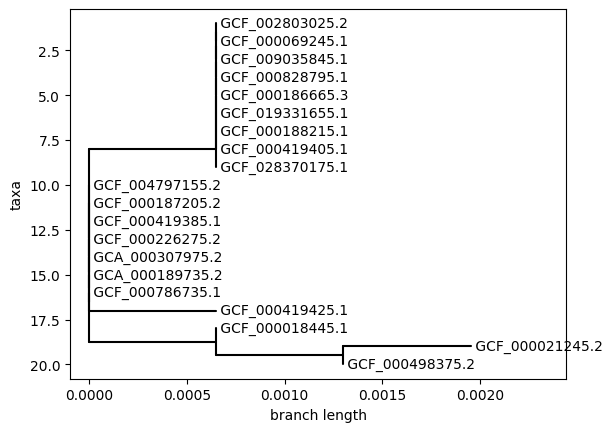

In [111]:
from Bio import Phylo
import matplotlib.pyplot as plt

tree = Phylo.read("tree.nwk", "newick")

Phylo.draw(tree) 

### Сопоставил id штаммов и их названия

In [58]:
import json

input_file = "acinetobacter_genomes/ncbi_dataset/data/assembly_data_report.jsonl"
output_file = "assembly_mapping.txt"

with open(input_file) as f, open(output_file, "w") as out:
    for line in f:
        data = json.loads(line)
        accession = data.get("currentAccession", "")
        # organism name
        organism_name = data.get("organism", {}).get("organismName", "")
        # strain
        strain = data.get("organism", {}).get("infraspecificNames", {}).get("strain", "")
        # если strain пустой, используем только organism_name
        full_name = organism_name if not strain else f"{organism_name} {strain}"
        out.write(f"{accession}\t{full_name}\n")

In [59]:
!cat assembly_mapping.txt

GCA_000189735.2	Acinetobacter baumannii TCDC-AB0715 TCDC-AB0715
GCA_000307975.2	Acinetobacter baumannii AC30 AC30
GCF_000018445.1	Acinetobacter baumannii ACICU ACICU
GCF_000021245.2	Acinetobacter baumannii AB0057 AB0057
GCF_000069245.1	Acinetobacter baumannii AYE AYE
GCF_000186665.3	Acinetobacter baumannii D1279779 D1279779
GCF_000187205.2	Acinetobacter baumannii MDR-TJ MDR-TJ
GCF_000188215.1	Acinetobacter baumannii 1656-2 1656-2
GCF_000226275.2	Acinetobacter baumannii MDR-ZJ06 MDR-ZJ06
GCF_000419385.1	Acinetobacter baumannii BJAB07104 BJAB07104
GCF_000419405.1	Acinetobacter baumannii BJAB0715 BJAB0715
GCF_000419425.1	Acinetobacter baumannii BJAB0868 BJAB0868
GCF_000498375.2	Acinetobacter baumannii DU202 DU202
GCF_000786735.1	Acinetobacter baumannii LAC-4 LAC-4
GCF_000828795.1	Acinetobacter baumannii NCGM 237 NCGM 237
GCF_002803025.2	Acinetobacter baumannii AB307-0294 AB307-0294
GCF_004797155.2	Acinetobacter baumannii ATCC 17978 ATCC 17978 substr. PMR-High
GCF_009035845.1	Acinetobacter

### Добавил на дерево информацию о налиичии T6SS

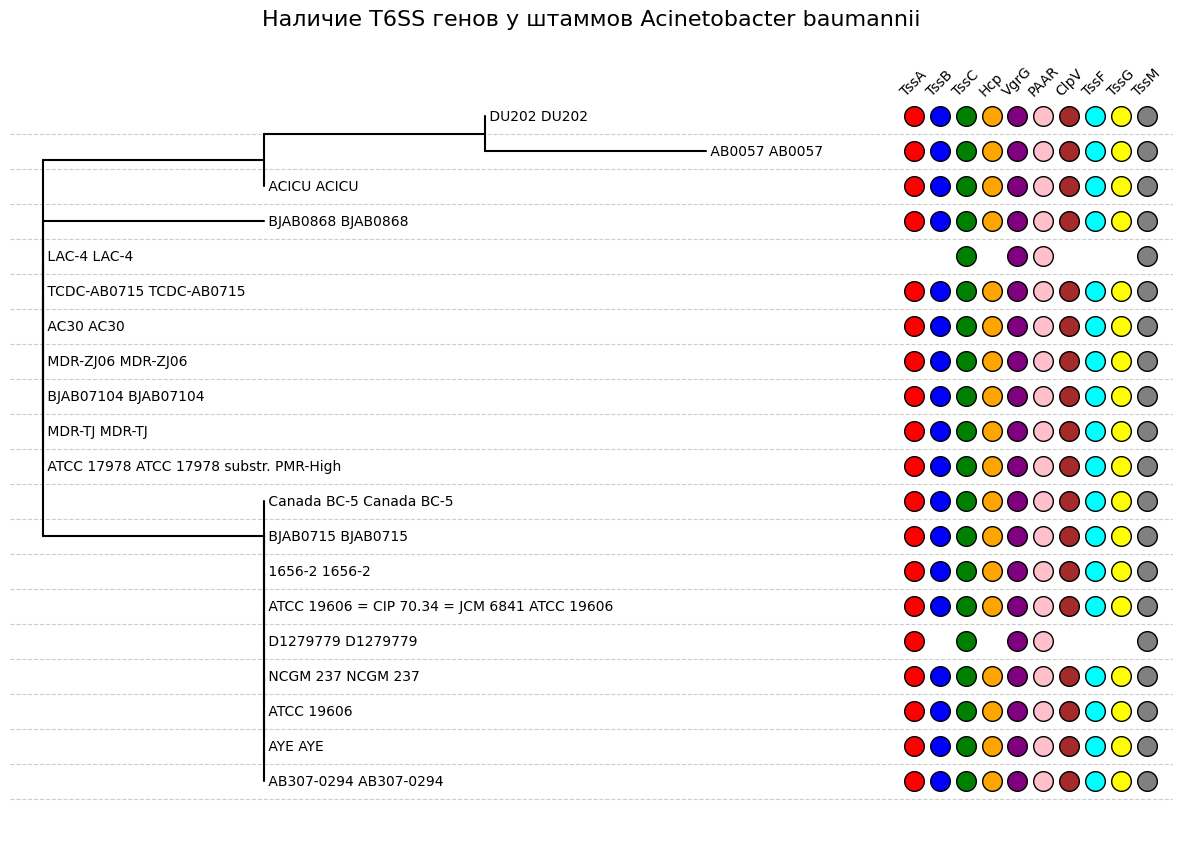

In [112]:
from Bio import Phylo
import matplotlib.pyplot as plt
import pandas as pd

tree = Phylo.read("tree.nwk", "newick")
df = pd.read_csv("t6ss_presence.csv")

T6SS_COLORS = {
    "TssA": "red",
    "TssB": "blue",
    "TssC": "green",
    "Hcp": "orange",
    "VgrG": "purple",
    "PAAR": "pink",
    "ClpV": "brown",
    "TssF": "cyan",
    "TssG": "yellow",
    "TssM": "grey",
}

genes = ['TssA', 'TssB', 'TssC', 'Hcp', 'VgrG', 'PAAR', 'ClpV', 'TssF', 'TssG', 'TssM']

strain_names = {}

with open("assembly_mapping.txt") as f:
    for line in f:
        if not line.strip():
            continue

        parts = line.rstrip("\n").split("\t")
        strain_id = parts[0]

        tokens = parts[1].split()
        strain = " ".join(tokens[2:])

        strain_names[strain_id] = strain


for clade in tree.get_terminals():
    strain_id = clade.name.replace("_protein", "")
    if strain_id in strain_names:
        clade.name = strain_names[strain_id]


fig, ax = plt.subplots(figsize=(15, 10))
Phylo.draw(
    tree,
    axes=ax,
    do_show=False,
    label_func=lambda clade: clade.name,
    label_colors=lambda clade: "black"
)
for text in ax.texts:
    text.set_fontsize(10)

leaf_y_dict = {clade.name: i for i, clade in enumerate(tree.get_terminals())}

x_min, x_max = ax.get_xlim()
x_offset = (x_max - x_min) * 0.05 
gap = (x_max - x_min) * 0.03
marker_size = 200

for i, gene in enumerate(genes):
    ax.text(x_max + x_offset + i*gap, len(leaf_y_dict)+0.5, gene, ha='center', va='bottom', fontsize=10, rotation=45)

for _, row in df.iterrows():
    strain_id = row['Strain'].replace("_protein","")
    strain = strain_names.get(strain_id)
    if strain is None:
        continue

    y = leaf_y_dict.get(strain)
    if y is None:
        continue

    x = x_max + x_offset
    for gene in genes:
        if row.get(gene) == 1:
            ax.scatter(
                x, y+1,
                s=marker_size,
                facecolor=T6SS_COLORS[gene],
                edgecolor='black',
                linewidth=1.0,
                zorder=5
            )
        x += gap

for y in leaf_y_dict.values():
    ax.hlines(y+0.5, x_min, x_max + x_offset + len(genes)*(circle_radius*2 + 0.01*(x_max - x_min)),
              linestyles='dashed', colors='black', alpha=0.2, linewidth=0.8)

ax.set_ylim(-1, len(tree.get_terminals())+1)
ax.set_xlim(x_min, x_max + x_offset + len(genes)*gap)
ax.axis('off')
ax.set_title(
    "Наличие T6SS генов у штаммов Acinetobacter baumannii",
    fontsize=16,
    pad=40
)

plt.show()